In [1]:
import numpy as np
from maxvolpy.maxvol import maxvol
from numpy.polynomial import Chebyshev as T
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# this function approximates set of points (arr, rhs) with linear combination of either Chebyshev polynomials or monomials
'''
Input:
x – all the points
f – right hand side values f(x)
basis = ('cheb', 'poly') – basis functions
degree – highest degree of appr polynomial
grid type = ('unif', 'cheb', 'maxvol') 
dom – interval of x
'''
def approx(arr, rhs, degree, grid, dom):
    num_of_points = degree + 1
    
    A = np.zeros((2*len(arr), num_of_points), dtype = np.float64) # Matrix of function values
    
    for j in range(num_of_points):
        for i in np.arange(0, 2*len(arr), 2):
            A[i, j] = T.basis(j)(arr[i/2])
            A[i + 1, j] = T.basis(j).deriv(1)(arr[i/2])
    #np.set_printoptions(precision=2)
    #print(A,'\n', A.shape, np.linalg.matrix_rank(A)) 
    print(A.shape,'\n', np.linalg.matrix_rank(A)) 
    
    
    # grid        
    
    if (grid == 'maxvol_nonblocked'):
        row_indx, _ = maxvol(A)
        row_indx = np.sort(row_indx)
    # solution 
    c = np.linalg.solve(A[row_indx], rhs[row_indx])
    f_appr = np.polynomial.chebyshev.chebval(arr, c)  
    
    print(arr.shape, f_appr.shape, rhs.shape, row_indx.shape)

    row_indx_even = []
    row_indx_odd = []
    
    for i in range(row_indx.shape[0]):   
        if row_indx[i] % 2 == 0:
            row_indx_even.append(row_indx[i]) 
        else:
            row_indx_odd.append(row_indx[i])    
    row_indx_odd =  np.array(row_indx_odd, dtype=int)
    row_indx_even = np.array(row_indx_even, dtype=int)
    # mapping 'doubled' indices on the linear space array
    a = ((row_indx_odd - 1) / 2.).astype(int) 
    b = (row_indx_even / 2.).astype(int)
    # auxiliary array for visualising derivative point distribution
    unit = np.ones(row_indx_odd.shape[0], dtype = int)
    print(row_indx_odd, row_indx_even)
    
    plt.plot(arr, rhs[::2], 'b', arr, f_appr, 'r--', arr[a], unit, 'go', arr[b], rhs[row_indx_even], 'yo')
    plt.grid()
    plt.title(grid)
    plt.show()
        
    # error
    print('Error_' + grid + ' = ', la.norm(rhs[::2] - f_appr, 2) / la.norm(rhs[::2], 2))
    print

/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(1200, 28) 
 14
(600,) (600,) (1200,) (28,)
[   1    9   27   55   85  129  175  225  285  337  403  463  539  599  681
  749  813  883  947 1003 1055 1103 1137 1165 1183 1195 1199] [598]


/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/glebsg/miniconda2/envs/maxvol/lib/python3.6/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


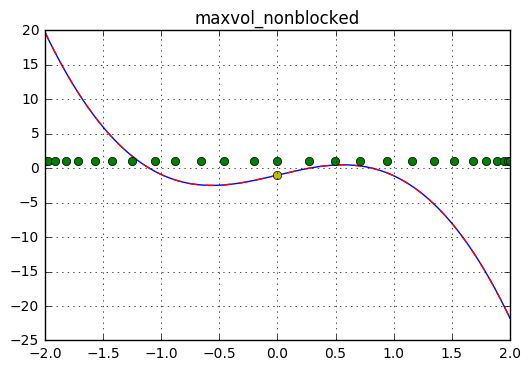

Error_maxvol_nonblocked =  4.36291983714e-15


In [7]:
# let's test our approx function here
n = 600     # number of sampling points   
deg = 27   # degree of polynomial          
interval = [-2, 2]  # interval of x
x = np.linspace(interval[0], interval[1], n, dtype=np.float64) 
f = np.zeros(2*len(x), dtype=np.float64)
for cou in np.arange(0, 2*len(x), 2):
    f[cou] = 2*x[cou/2]**3 - 5*x[cou/2]**3 + 2*x[cou/2] - 1 + np.sin(2*x[cou/2])
    f[cou + 1] = 6*x[cou/2]**2 - 15*x[cou/2]**2 + 2 + 2*np.cos(2*x[cou/2])
    #f[cou] = 1/(x[cou/2]**2 + 1)
    #f[cou+1] = -2*x[cou/2]/((x[cou/2]**2 + 1)**2)
    #f[cou] = np.exp(-x[cou/2])*(np.sin(x[cou/2]))**2
    #f[cou + 1] = np.exp(-x[cou/2])*np.sin(x[cou/2])*(2*np.cos(x[cou/2]) - np.sin(x[cou/2]))
    
approx(x, f, degree = deg, grid = 'maxvol_nonblocked', dom = interval)